(k_means_clustering)=

# K-means Clustering


So far, we have learned a lot of supervised learning algorithms (eg., Decision Tree, Random Forest), 
in which labelled or known outcomes are given. In contrast, unsupervised learning uses unlabeled data 
to discover patterns that help solve for clustering or association problems, and K-means clustering 
is one of the simplest and most popular unsupervised learning algorithms.

From wiki: 
> Given a set of observations $(\boldsymbol{x}_1, \boldsymbol{x}_2, \dots, \boldsymbol{x}_n)$, 
> where each observation is a d-dimensional real vector, k-means clustering aims to 
> partition the n observations into k (≤ n) sets $\boldsymbol{S} = \{S_1, S_2, \dots, S_k\}$ 
> so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). 
> Formally, the objective is to find:
> \begin{equation*}
\underset{S}{\mathrm{argmin}} 
\sum_{i=1}^{k}\sum_{\boldsymbol{x}\in S_i} \left\|\boldsymbol{x}-\boldsymbol{\mu}_i \right\|^2
\end{equation*}
> where $\boldsymbol{\mu}_i$ is the mean of points in $S_i$.

## Lloyd's algorithm

1. Initialize $\boldsymbol{\mu}_i$ randomly
1. Alternate:
    - assignment: $S_i$ <- $\underset{S}{\mathrm{argmin}}
      \sum_{i=1}^{k}\sum_{\boldsymbol{x}\in S_i} \left\|\boldsymbol{x}-\boldsymbol{\mu}_i \right\|^2$ 
      for all i
    - update: $\mu_i$ <- $\frac{1}{|S_i|}\sum_{\boldsymbol{x}_j\in S_i}{\boldsymbol{x}_j}$
1. When `iter = max_iter` or when the assignments do not change, algorithm terminates

Source: <https://en.wikipedia.org/wiki/K-means_clustering#Gaussian_mixture_model>

## Implementation

Like many other popular algorithms, K-means can also be implemented by importing the `scikit-learn` package

## Iris data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

We first plot the observations by their true species.

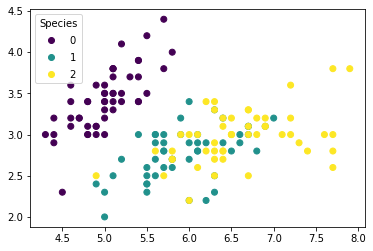

In [3]:
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=y)
ax.legend(*scatter.legend_elements(),
          loc="upper left", title="Species")
plt.show()

### Training K-means

Now let's pretend we do not know the true borough of each data point, 
and try to predict it with their longitude and latitude.

In [4]:
from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters = 3)
Kmean.fit(X)

KMeans(n_clusters=3)

Several parameters can be modified in the algorithm, see
<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>


### Results

The predicted centroids can be obtained by `Kmean.cluster_centers_`.

[[6.81276596 3.07446809]
 [5.77358491 2.69245283]
 [5.006      3.428     ]]


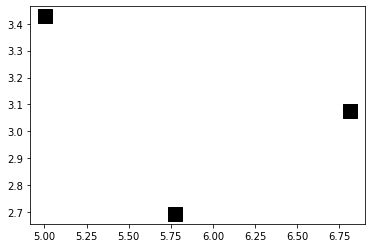

In [5]:
print(Kmean.cluster_centers_)

fig = plt.figure()

plt.scatter(Kmean.cluster_centers_[:,0], Kmean.cluster_centers_[:,1], c="black", s=200, marker='s')
plt.show()

The trained labels can be obtained by `Kmean.labels_`, and now we can compare them to the true values.

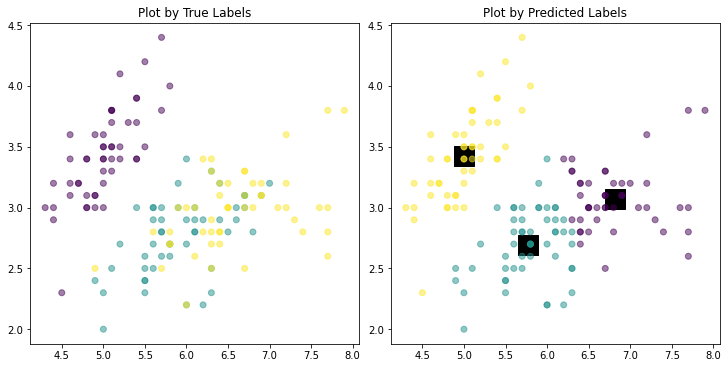

In [6]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5),
                        constrained_layout=True)

axs[0].scatter(X[:,0], X[:,1], c = y, alpha = 0.5)
axs[0].set_title("Plot by True Labels")

axs[1].scatter(Kmean.cluster_centers_[:,0], Kmean.cluster_centers_[:,1], 
                marker = "s", c = "black", s = 400, alpha = 1) # plot predicted centroids
axs[1].scatter(X[:,0], X[:,1], c = Kmean.labels_, alpha = 0.5) 
axs[1].set_title("Plot by Predicted Labels")

plt.show()

The algorithm seems to be good yet there are several "misclassified" data points, 
mainly in the two clusters that are more mixed (non-separable).
This is reasonable since K-means only minimizes within-cluster variances (squared Euclidean distances).

### Prediction

If we have some new data, we can use `Kmean.predict` to predict which cluster they belong to.

In [7]:
sample_test=np.array([[3, 4], [7, 4]])

Kmean.predict(sample_test)

array([2, 0], dtype=int32)

## Comment

K-means is a powerful unsupervised clustering algorithm that can be easily understood and implemented, 
but there are still some disadvantages. 

- The algorithm is extremly sensitive to the choice of initial cluster centroids. 
  In the above problem, we use default parameters `init='k-means++'` and `n_init = 10`
  to avoid local minimums. See 
  <https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#h2_9.>
  
- The number K is another important parameter in the algorithm. In our problem we just use `k=3`   because 
  there are 3 species in the data set, but in pratice this can be more complicated.
  A plot of "elbow curve" can be used to determine K. See
  <https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#h2_9.>
  
- In cases where the underlying clusters are non-spherical, K-means will perform badly. In such cases, 
  the algorithms can be run with "kernel methods". See
  <https://medium.com/udemy-engineering/understanding-k-means-clustering-and-kernel-methods-afad4eec3c11>